In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 1. Import Data

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/Dataset/Titanic_train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/Dataset/Titanic_test.csv')

# 2. Data Cleaning

In [ ]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2.1 Delete outliers

In [ ]:
data1 = data_train.copy()

In [ ]:
def detect_outliers(df,n,features):
  outlier_indices = []
  for col in features:
    Q1 = np.percentile(df[col],25)
    Q3 = np.percentile(df[col],75)
    IQR = Q3 - Q1 
    outlier_step = 1.5 * IQR
    outlier_index = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
    outlier_indices.extend(outlier_index)

  outlier_indices = Counter(outlier_indices)
  multiple_outliers = [k for k,v in outlier_indices.items() if v>n]
  return multiple_outliers

outliers_to_drop = detect_outliers(data1,2,['Age','Parch','Fare','SibSp'])
data1.iloc[outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
#delete outliers
data2 = data1.drop(outliers_to_drop,axis=0).reset_index(drop=True)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Ticket       881 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


## 2.2 Deal with null

Embarked:

In [ ]:
data2['Embarked'] = data2.Embarked.fillna('S')

Age:

The wealthier passengers in the higher classes tend to be older, which makes sense.  
Use the average age values to impute based on Pclass for Age.

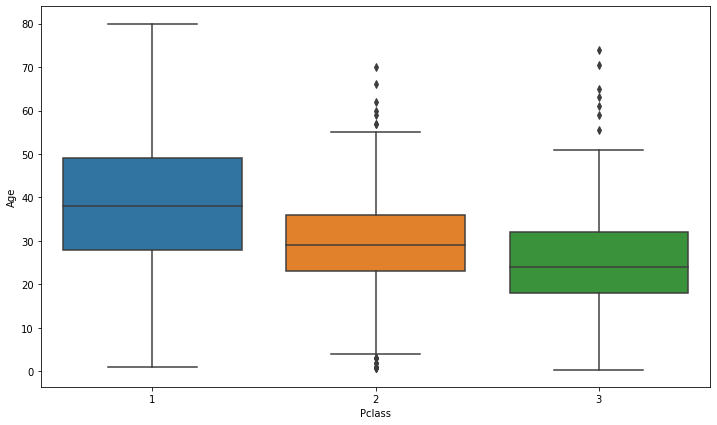

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=data2)

In [ ]:
mean_Age = data2.groupby("Pclass")["Age"].mean()
print(mean_Age)

Pclass
1    38.499563
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38.2

        elif Pclass == 2:
            return 29.8

        else:
            return 24.1

    else:
        return Age

data2['Age'] = data2[['Age','Pclass']].apply(impute_age,axis=1)

Cabin:

Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. Most likely we will drop this, or change it to another feature like "Cabin Known: 1 or 0"

In [ ]:
data2.drop('Cabin',axis=1,inplace=True)

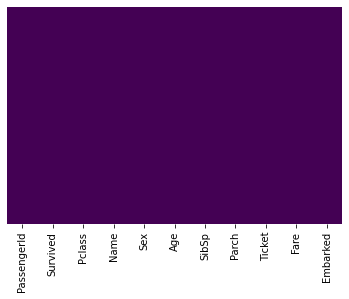

In [ ]:
sns.heatmap(data2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##2.3 one-hot encoding and drop

In [ ]:
Sex_male = pd.get_dummies(data2['Sex'],drop_first=True)
Sex_male

,male
0,1
1,0
2,0
3,0
4,1
...,...
876,1
877,0
878,0
879,1


In [ ]:
Embarked = pd.get_dummies(data2['Embarked'])
Embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
876,0,0,1
877,0,0,1
878,0,0,1
879,1,0,0


In [ ]:
data3 = pd.concat([data2,Sex_male,Embarked],axis=1)
data3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,0,1


In [ ]:
data3.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [ ]:
data3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


# 3. EDA & Feature Engineering


In [ ]:
def categorical_plot(df,feature):
  sns.countplot(data=df, x=feature)
  sns.factorplot(data=df, x=feature, y='Survived', kind='bar')

Pclass:

class3 has the most people, but the least percentage of survived people. (# of Survived=1)/# of Pclass=3

This is an important factor to analyze survive or not.

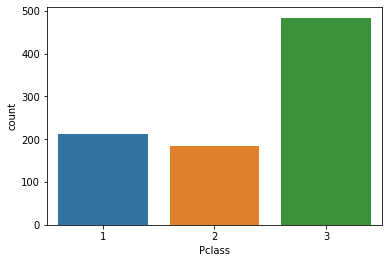

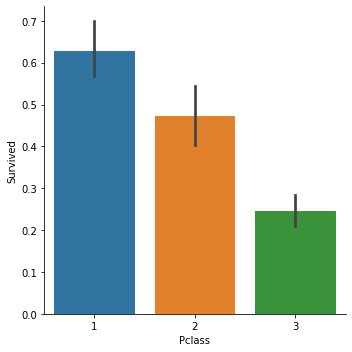

In [ ]:
categorical_plot(data3,'Pclass')

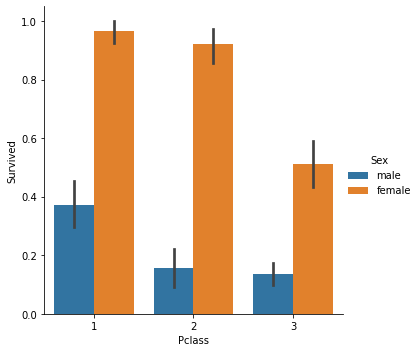

In [ ]:
sns.factorplot(data=data2,x='Pclass',y='Survived',hue='Sex',kind='bar')

Embarked：

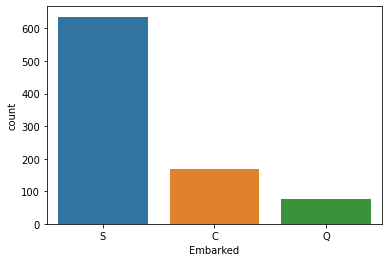

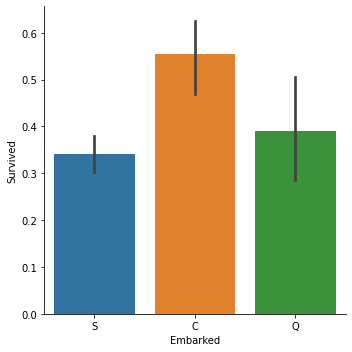

In [ ]:
categorical_plot(data2,'Embarked')

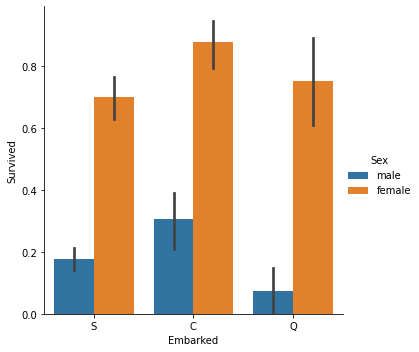

In [ ]:
sns.factorplot(data=data2, x='Embarked', y='Survived', hue='Sex', kind='bar')

Sex:

male--more people but less survived

Important factor to analyze.

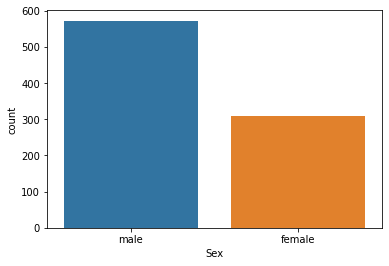

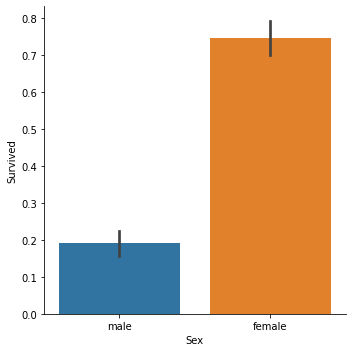

In [ ]:
categorical_plot(data2,'Sex')

Unbalanced_data?

For 'Survived' values, there's no huge unbalance.

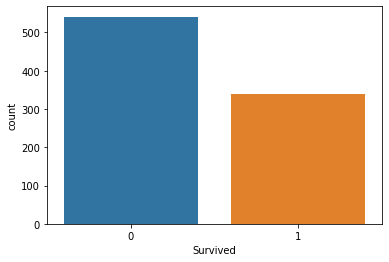

In [ ]:
sns.countplot(data=data3,x='Survived')

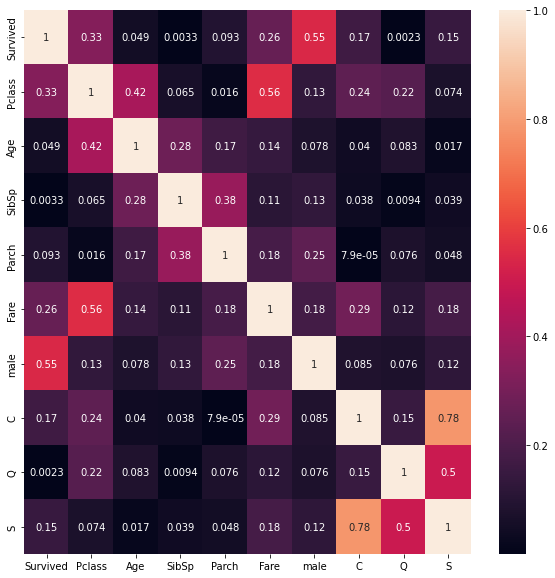

In [ ]:
corr_matrix = data3.corr()
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(np.absolute(corr_matrix), annot=True)

# 4. Data Modeling

##4.1 Train test split

In [ ]:
from sklearn.model_selection import train_test_split

data3.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'C', 'Q',
       'S'],
      dtype='object')

In [ ]:
X = data3.drop('Survived',axis=1)
y = data3['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

##4.2 Model Building & Paramter Tuning

### 4.2.1 Logistics Regression

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()

C = np.arange(0.1,1,0.1)
penalty = ['l1','l2']

param_grid = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(lgr, param_grid, scoring='accuracy', cv=5)
grid_result = grid_search.fit(X_train, y_train)

result_lgr =pd.DataFrame(grid_result.cv_results_)
result_lgr.sort_values(by='mean_test_score',ascending=False)[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.027070,0.003139,0.002601,0.000292,0.2,l2,"{'C': 0.2, 'penalty': 'l2'}",0.790323,0.886179,0.796748,0.804878,0.821138,0.819853,0.034730,1
11,0.029962,0.006317,0.002499,0.000188,0.6,l2,"{'C': 0.6, 'penalty': 'l2'}",0.774194,0.886179,0.788618,0.796748,0.821138,0.813375,0.039459,2
7,0.029344,0.007132,0.002518,0.000273,0.4,l2,"{'C': 0.4, 'penalty': 'l2'}",0.782258,0.886179,0.788618,0.796748,0.813008,0.813362,0.037837,3
9,0.027878,0.003558,0.002486,0.000128,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.766129,0.886179,0.788618,0.796748,0.821138,0.811762,0.041156,4
5,0.034486,0.006218,0.003257,0.001133,0.3,l2,"{'C': 0.30000000000000004, 'penalty': 'l2'}",0.782258,0.869919,0.788618,0.813008,0.804878,0.811736,0.031104,5


In [ ]:
best_lgr = grid_search.best_estimator_
y_pred = best_lgr.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7849056603773585


### 4.2.2 RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [ ]:
n_estimators = [i for i in range(50,350,10)]
max_depth = [i for i in range(7,12,1)]

param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

grid_search = GridSearchCV(rfc, param_grid, scoring='accuracy', cv=5)
grid_result = grid_search.fit(X_train, y_train)

result_rfc = pd.DataFrame(grid_result.cv_results_)
result_rfc.sort_values(by='mean_test_score',ascending=False)[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
38,0.205740,0.003622,0.017191,0.000413,8,130,"{'max_depth': 8, 'n_estimators': 130}",0.806452,0.918699,0.804878,0.869919,0.821138,0.844217,0.044079,1
62,0.119822,0.004998,0.012245,0.001817,9,70,"{'max_depth': 9, 'n_estimators': 70}",0.766129,0.918699,0.788618,0.869919,0.869919,0.842657,0.056649,2
45,0.319663,0.008773,0.026265,0.001041,8,200,"{'max_depth': 8, 'n_estimators': 200}",0.806452,0.910569,0.796748,0.869919,0.829268,0.842591,0.042315,3
72,0.278520,0.009425,0.022371,0.000880,9,170,"{'max_depth': 9, 'n_estimators': 170}",0.782258,0.910569,0.796748,0.869919,0.845528,0.841004,0.047129,4
70,0.237933,0.006232,0.020384,0.001080,9,150,"{'max_depth': 9, 'n_estimators': 150}",0.790323,0.910569,0.796748,0.869919,0.837398,0.840991,0.045201,5


In [ ]:
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8037735849056604


### 4.2.3 Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

In [ ]:
n_estimators = [i for i in range(50,350,10)]
max_depth = [i for i in range(7,13,1)]

param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

grid_search = GridSearchCV(gbc, param_grid, scoring='accuracy', cv=5)
grid_result = grid_search.fit(X_train,y_train)

result_gbc = pd.DataFrame(grid_result.cv_results_)
result_gbc.sort_values(by='mean_test_score',ascending=False)[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.216053,0.007378,0.003618,0.000215,7,80,"{'max_depth': 7, 'n_estimators': 80}",0.782258,0.886179,0.723577,0.861789,0.804878,0.811736,0.057853,1
4,0.239647,0.005843,0.003917,0.000695,7,90,"{'max_depth': 7, 'n_estimators': 90}",0.774194,0.869919,0.739837,0.853659,0.804878,0.808497,0.048407,2
0,0.141724,0.006219,0.003496,0.000323,7,50,"{'max_depth': 7, 'n_estimators': 50}",0.774194,0.869919,0.723577,0.869919,0.796748,0.806871,0.056671,3
7,0.324306,0.009622,0.003637,0.000182,7,120,"{'max_depth': 7, 'n_estimators': 120}",0.758065,0.878049,0.731707,0.845528,0.813008,0.805271,0.054069,4
98,0.643634,0.033842,0.004772,0.000175,10,130,"{'max_depth': 10, 'n_estimators': 130}",0.774194,0.878049,0.731707,0.837398,0.804878,0.805245,0.050411,5


In [ ]:
best_gbc = grid_search.best_estimator_
y_pred = best_gbc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7849056603773585


# 5. Model Interpretation & Conclusions

## 5.1 test data preparation

In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/Dataset/Titanic_test.csv')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
mean_Age_test = data_test.groupby("Pclass")["Age"].mean()
print(mean_Age_test)

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64


In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 40.9

        elif Pclass == 2:
            return 28.8

        else:
            return 24.10

    else:
        return Age

data_test['Age'] = data_test[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
data_test['Fare'].mean()

35.6271884892086

In [ ]:
data_test['Fare'] = data_test.Fare.fillna(35.62)

In [ ]:
Sex_male_test = pd.get_dummies(data_test['Sex'],drop_first=True)
Embarked_test= pd.get_dummies(data_test['Embarked'])
test = pd.concat([data_test,Sex_male_test,Embarked_test],axis=1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,0,1


In [ ]:
test.drop(['PassengerId','Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
 5   male    418 non-null    uint8  
 6   C       418 non-null    uint8  
 7   Q       418 non-null    uint8  
 8   S       418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 18.1 KB


## 5.2 results

In [ ]:
test_result = pd.Series(best_rfc.predict(test), name='Survived').astype(int)
results = pd.concat([data_test['PassengerId'],test_result],axis=1)
results.to_csv('titanic_submission.csv',index=False)